<a href="https://colab.research.google.com/github/mretana1999/Intro-to-Python/blob/main/assignment6/a6_mretanarodri2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6 Project
## Names
* Mauricio Retana - Z23484829
* Armaghan Ali - Z23493533
* Ryan Bharath - Z23481730

###Date:  7/05/21 - Class: COP 4045 - Python Programming Assignment 6
###Professor: Dr. Marques

In [ ]:
from google.colab import files
files.upload()

Saving iris.csv to iris.csv


{'iris.csv': b'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3.0,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5.0,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5.0,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3.0,1.4,0.1,setosa\n4.3,3.0,1.1,0.1,setosa\n5.8,4.0,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1.0,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5.0,3.0,1.6,0.2,setosa\n5.0,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.0,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3.0,1.3,0.

In [ ]:
import csv
import statistics
import matplotlib.pyplot as plt

# Dividing the code into functions:

In [ ]:
def initialize_iris_dict(csv_reader):
  '''Takes a csv dictionary reader and returns a dictionary of dictionaries, where the outer dictionary keys are the species names and the inner dictionaries contain a list with the attribute values'''
  iris_dict = {}
  for row in csv_reader:
    if row['species'] not in iris_dict:
      iris_dict[row['species']] = {'sepal_length':[float(row['sepal_length'])], 'sepal_width':[float(row['sepal_width'])], 'petal_length':[float(row['petal_length'])],'petal_width':[float(row['petal_width'])]}
    else:
      iris_dict[row['species']]['sepal_length'].append(float(row['sepal_length']))
      iris_dict[row['species']]['sepal_width'].append(float(row['sepal_width']))
      iris_dict[row['species']]['petal_length'].append(float(row['petal_length']))
      iris_dict[row['species']]['petal_width'].append(float(row['petal_width']))
  return iris_dict

def initialize_summary_dict(iris_dict, summary_dict):
  '''Takes an iris_dict (with the original values or normalized) created with the initialize_iris_dict() or initialize_norm_iris() functions, and creates a summary dictionary.
  The summary dictionary is a dictionary of dictionaries. The outer dictionary has species names as keys and the inner dictionaries contain the summary of attributes.'''
  for key in iris_dict:
    summary_dict[key] = {}
  summary_dict = compute_avg(iris_dict, summary_dict)
  summary_dict = compute_standard_deviation(iris_dict, summary_dict)
  summary_dict = get_max(iris_dict, summary_dict)
  summary_dict = get_min(iris_dict, summary_dict)
  summary_dict = get_count(iris_dict, summary_dict)
  return summary_dict

def compute_avg(iris_dict, summary_dict):
  ''' Computes average of a list of attribute values for iris_dict (with the original values or normalized values). The average is then added to the summary_dict. '''
  for key in iris_dict:
    summary_dict[key].update({'avg_sepal_length': statistics.mean(iris_dict[key]['sepal_length']),
                         'avg_sepal_width': statistics.mean(iris_dict[key]['sepal_width']),
                         'avg_petal_length': statistics.mean(iris_dict[key]['petal_length']),
                         'avg_petal_width': statistics.mean(iris_dict[key]['petal_width'])})
  return summary_dict

def compute_standard_deviation(iris_dict, summary_dict):
  ''' Compute the standard deviation from each list of iris_dict. The standard deviation value then is added to the summary_dict. '''
  for key in iris_dict:
    summary_dict[key].update({'std_sepal_length': round(statistics.stdev(iris_dict[key]['sepal_length']), 3),
                      'std_sepal_width': round(statistics.stdev(iris_dict[key]['sepal_width']), 3),
                      'std_petal_length': round(statistics.stdev(iris_dict[key]['petal_length']), 3),
                      'std_petal_width': round(statistics.stdev(iris_dict[key]['petal_width']), 3)})
  return summary_dict

def get_max(iris_dict, summary_dict):
  ''' Compute the maximum value from each list of iris_dict. The max value is then added to the summary_dict. '''
  for key in iris_dict:
    summary_dict[key].update({'max_sepal_length': max(iris_dict[key]['sepal_length']),
                         'max_sepal_width': max(iris_dict[key]['sepal_width']),
                         'max_petal_length': max(iris_dict[key]['petal_length']),
                         'max_petal_width': max(iris_dict[key]['petal_width'])})
  return summary_dict

def get_min(iris_dict, summary_dict):
  ''' Compute the minimum value from each list of iris_dict. The minimum value is then added to the summary_dict. '''
  for key in iris_dict:
    summary_dict[key].update({'min_sepal_length': min(iris_dict[key]['sepal_length']),
                         'min_sepal_width': min(iris_dict[key]['sepal_width']),
                         'min_petal_length': min(iris_dict[key]['petal_length']),
                         'min_petal_width': min(iris_dict[key]['petal_width'])})
  return summary_dict

def get_count(iris_dict, summary_dict):
  '''Gets the count of each species and appends it to summary_dict'''
  for key in iris_dict:
    summary_dict[key].update({'count': len(iris_dict[key]['sepal_length'])})
  return summary_dict

def get_attributes_dict(summary_dict):
  '''Returns a list with the attributes from a summary_dict. This is then used for pretty printing.'''
  attributes = []
  for species in summary_dict:
    for attribute in summary_dict[species]:
      if attribute not in attributes:
        attributes.append(attribute)
  return attributes

def pretty_print(summary_dict):
  '''Function to pretty print summary_dict'''
  dashed_line = '\n' + '- ' * 83
  #attributes = ['avg_sepal_length','avg_sepal_width','avg_petal_length','avg_petal_width', 'std_sepal_length','std_sepal_width','std_petal_length','std_petal_width', 'max_sepal_length','max_sepal_width','max_petal_length','max_petal_width',
  #              'min_sepal_length','min_sepal_width','min_petal_length','min_petal_width', 'count']
  attributes = get_attributes_dict(summary_dict)
  print(dashed_line)
  print(f"|{'Species':^40}", end='|')
  for species in summary_dict:
    print(f'{species.capitalize():^40}', end='|') #print the species capitalized
  print(dashed_line)
  for attribute in attributes:
    print(f"|{attribute.replace('_',' ').capitalize():^40}",end='|') #print the attribute in the left column
    for species in summary_dict:
      print(f'{summary_dict[species][attribute]:^40.3f}',end='|') #print the attribute value for each species
    print() #empty line
  print(dashed_line.strip())

def plot_sepal_measurements(iris_dict):
  ''' Plots the data relating to the sepal length and the sepal width of each species. The output is displayed to a scatter graph. '''
  plt.title('Sepal Measurement Values')
  plt.xlabel('Sepal Length')
  plt.ylabel('Sepal Width')

  colors = ['m', 'y', 'r']

  for data in iris_dict.values():
    x = data.get('sepal_length')
    y = data.get('sepal_width')
    plt.scatter(x, y, color = colors.pop())
  
  plt.legend(iris_dict.keys(), title = 'Species')
  plt.show()

def plot_petal_measurements(iris_dict):
  ''' Plots the data relating to the petal length and the petal width of each species. The output is displayed to a scatter graph. '''
  plt.title('Petal Measurement Values')
  plt.xlabel('Petal Length')
  plt.ylabel('Petal Width')

  colors = ['m', 'y', 'r']

  for data in iris_dict.values():
    x = data.get('petal_length')
    y = data.get('petal_width')
    plt.scatter(x, y, color = colors.pop())
  
  plt.legend(iris_dict.keys(), title = 'Species')
  plt.show()

def plot_histogram(iris_dict):
  '''Plots all possible combinations of graphs with x and y coordinates that contain flower attributes'''
  attributes = ['sepal_length','sepal_width','petal_length','petal_width']
  colors = {'setosa':'r', 'versicolor':'y', 'virginica':'m'}
  plt.figure(figsize=(16,16))
  plt.suptitle('Iris dataset histogram',fontsize=24)
  for species in iris_dict:
    for i in range(len(attributes)):
      x = iris_dict[species][attributes[i]]
      for j in range(len(attributes)):
        y = iris_dict[species][attributes[j]]
        plt.subplot(4,4,(i*4) + (j+1))
        plt.scatter(x,y,color = colors[species])
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
  plt.legend(iris_dict.keys(), title = 'Species')
  plt.subplots_adjust(top=0.95)
  plt.show()
      
def initialize_norm_iris(iris_dict, norm_iris_dict):
  ''' Takes the original iris_dict and normalizes the list of attributes values for all the data points. Returns a dictionary that follows the same structure as iris_dict parameter. '''
  norm_iris_dict = {}
  for species in iris_dict:
    norm_iris_dict[species] = {}
    for attribute in iris_dict[species]:
      max_value = max(iris_dict[species][attribute])
      min_value = min(iris_dict[species][attribute])
      norm_iris_dict[species][attribute] = [(value - min_value) / (max_value - min_value) for value in iris_dict[species][attribute]]
  return norm_iris_dict  

def run_decision_tree(iris_dict):
  '''Runs a decision tree based on petal length and petal width for setosa, versicolor, and virginica species from Iris dataset.'''
  print('A decision tree will be used to classify the flowers in iris_dict based on petal length and petal width: \n')
  species_names = ['setosa','versicolor','virginica']
  parsed_petal_list = parse_petal_values(iris_dict,species_names) #dictionary with lists of tuples with (petal_length,petal_width) for each species
  labels = ['setosa']*50 + ['versicolor'] * 50 + ['virginica'] * 50
  predictions = []
  for i in range(len(labels)):
    if parsed_petal_list[i][0] < 2.5: #if petal length < 2.5
      predictions.append('setosa')
    else:
      if parsed_petal_list[i][1] <= 1.75: #if petal width <= 1.75
        predictions.append('versicolor')
      else:
        predictions.append('virginica')
  accuracy = calculate_prediction_accuracy(predictions, labels)
  print(f"Species have been classified with {accuracy}% accuracy")
  print(f"New samples input to the decision tree would be classified with approx. {accuracy}% accuracy")

def parse_petal_values(iris_dict,species_names):
  '''Takes created iris_dict and returns a single list of tuples (petal_length,petal_width) for all species'''
  parsed_petal_list = []
  for species in species_names:
    petal_length_list = [petal_length_value for petal_length_value in iris_dict[species]['petal_length']]
    petal_width_list = [petal_width_value for petal_width_value in iris_dict[species]['petal_width']]
    parsed_petal_list += list(zip(petal_length_list,petal_width_list))
  return parsed_petal_list
  
def calculate_prediction_accuracy(predictions_list, labels):
  '''Calculates and returns prediction accuracy of decision tree'''
  correct = 0
  missclassified = {}
  missclassified = {label:0 for label in labels if label not in missclassified} #initialize dictionary that keeps count of missclassifications to 0 for each unique label
  for i in range(len(labels)):
    if predictions_list[i] == labels[i]:
      correct += 1
    else:
      missclassified[labels[i]] += 1
  print(f"{correct} species were classified correctly")
  print(f"{len(labels) - correct} species were classified incorrectly")
  #print(missclassified)
  for species,count in missclassified.items():
    print(f"For the species **{species}**, {count} samples have been missclassified. That is a {count*100/50}% classification error for this class")
  return correct * 100 / len(labels)

# Main cell that calls functions:

These are our iris_dict and summary_dict data structure (for debugging purposes): 

{'setosa': {'sepal_length': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0], 'sepal_width': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3], 'petal_length': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4], 'petal_width': [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 

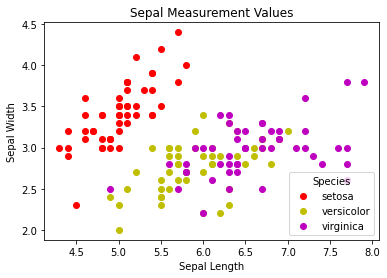

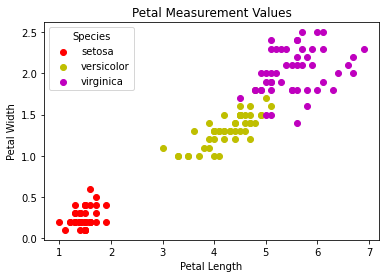

#--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# 

These are our normalized iris_dict (norm_iris_dict) and normalized (summary_norm_iris_dict) data structure (for debugging purposes): 

{'setosa': {'sepal_length': [0.5333333333333332, 0.40000000000000036, 0.2666666666666669, 0.19999999999999987, 0.4666666666666668, 0.7333333333333337, 0.19999999999999987, 0.4666666666666668, 0.06666666666666703, 0.40000000000000036, 0.7333333333333337, 0.3333333333333333, 0.3333333333333333, 0.0, 1.0, 0.9333333333333336, 0.7333333333333337, 0.5333333333333332, 0.9333333333333336, 0.5333333333333332, 0.7333333333333337, 0.5333333333333332, 0.19999999999999987, 0.5333333333333332, 0.3333333333333333, 0.4666666666666668, 0.4666666666666668, 0.6000000000000002, 0.6000000000000002, 0.2666666666666669, 0.333333

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:138: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


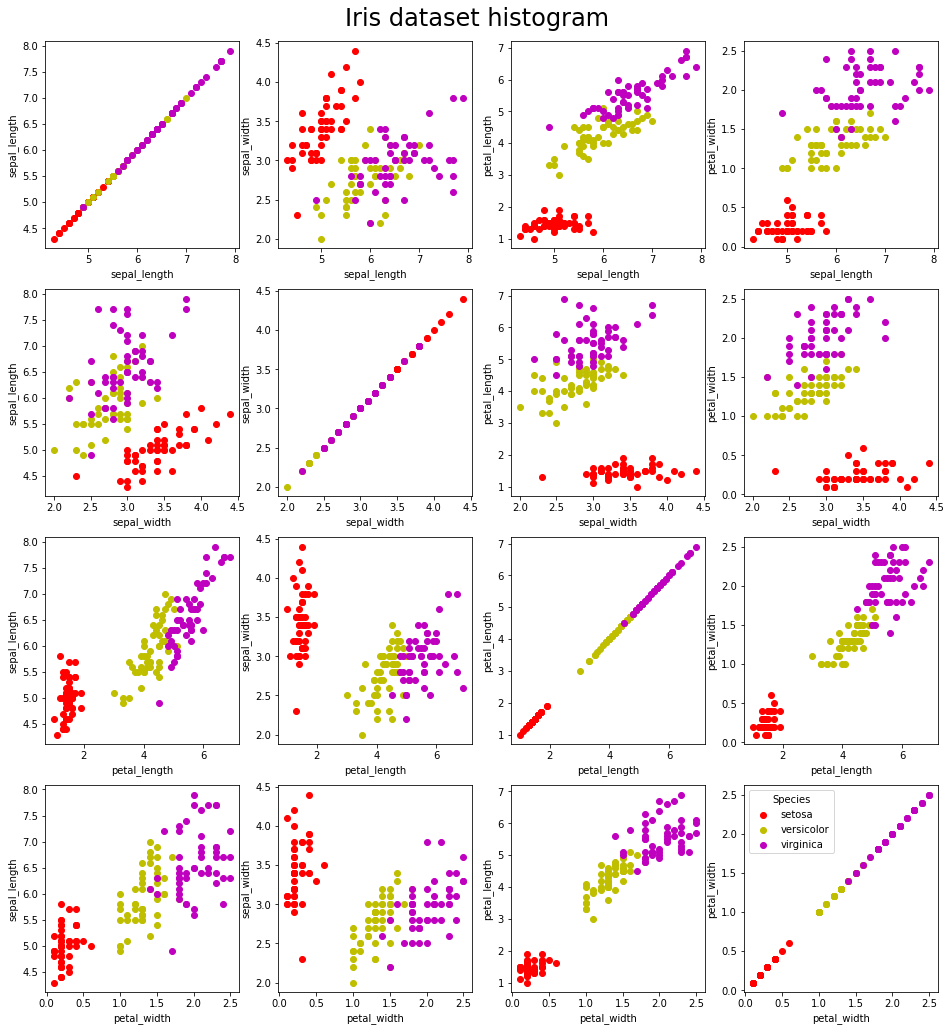

#--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# #--# 

A decision tree will be used to classify the flowers in iris_dict based on petal length and petal width: 

144 species were classified correctly
6 species were classified incorrectly
For the species **setosa**, 0 samples have been missclassified. That is a 0.0% classification error for this class
For the species **versicolor**, 1 samples have been missclassified. That is a 2.0% classification error for this class
For the species **virginica**, 5 samples have been missclassified. That is a 10.0% classification error for this class
Species have been classified with 96.0% accuracy
New samples input to the decision tree would be classified with approx. 96.0% accuracy


In [ ]:
# Names: 
# Armaghan Ali - 
# Mauricio Retana - Z23484829
# Ryan Bharath - Z23481730
# Date: 7/05/21
# COP 4045 - Python Programming
# Assignment 6
# Dr. Marques
#--------------------------------------------------------------------MAIN-----------------------------------------------------------------------#
csv_file = open('iris.csv','r')
csv_reader = csv.DictReader(csv_file)

iris_dict = {}
summary_dict = {}
norm_iris_dict = {}
summary_norm_iris_dict = {}

iris_dict = initialize_iris_dict(csv_reader) #initializing our iris_dict data structure
print('These are our iris_dict and summary_dict data structure (for debugging purposes): \n')
print(iris_dict)
summary_dict = initialize_summary_dict(iris_dict,summary_dict) #create dictionary with summary values
print(summary_dict)
print('\nThis is the summary_dict pretty printed:')
pretty_print(summary_dict)
print('#--# '*50 + '\n')

print('These are some plots using the attributes from the iris flower classes:')
plot_sepal_measurements(iris_dict)
plot_petal_measurements(iris_dict)
print('#--# '*50 + '\n')

norm_iris_dict = initialize_norm_iris(iris_dict, norm_iris_dict)
print('These are our normalized iris_dict (norm_iris_dict) and normalized (summary_norm_iris_dict) data structure (for debugging purposes): \n')
print(norm_iris_dict)
summary_norm_iris_dict = initialize_summary_dict(norm_iris_dict, summary_norm_iris_dict)
print(summary_norm_iris_dict)
print('\nThis is the summary of our normalized data pretty printed:')
pretty_print(summary_norm_iris_dict)
print('#--# '*50 + '\n')

plot_histogram(iris_dict)
print('#--# '*50 + '\n')

run_decision_tree(iris_dict)

# Diagram of our decision tree implementation:

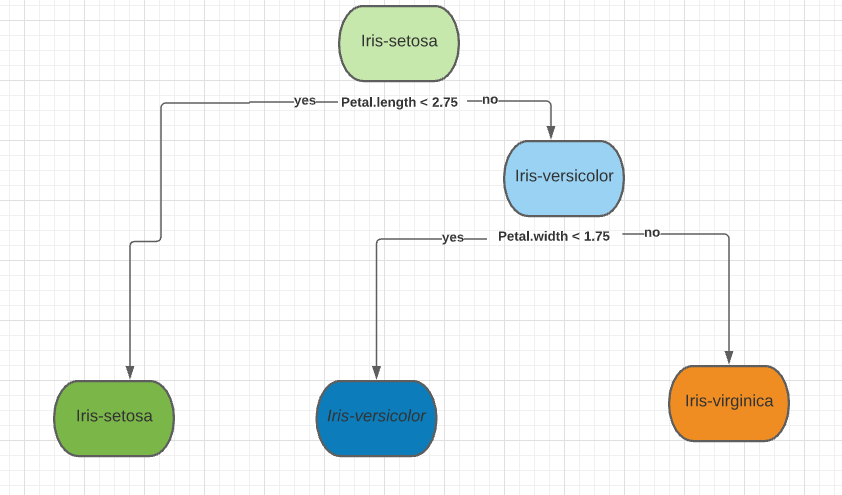

In [ ]:
csv_file.close()

#Project Report
## Project Tasks:
* For this project, the assignment is split up into three tasks: Design, Coding, and Documentation
    * Design Role - Mauricio Retana, Ryan Bharath, Armaghan Ali
    * Coding Role - Mauricio Retana, Ryan Bharath, Armaghan Ali
    * Documentation Role - Mauricio Retana, Ryan Bharath, Armaghan Ali
* Instead of assigning one person to each role, we agreed to help eachother when it came to design, coding and documentation
* Ali designed the diagram for the decision tree classifier 

## Project Design:
* We used the divide and conquer approach in this assignment. Each problem is split up into sub-problems and each sub-problem uses a function.
Eventually the solutions from these subproblems are combined together to get the final solution

### Libraries used for this project:
* statistics module
    - used to calculate average and standard deviation
* matplotlib module
    - used for plotting data. Graphs were formatted in scatter and histogram plots
* csv module
    - used for parsing and reading the data from the csv file

## Project Code:
* For the implementation of this project, all three of us decided to implement the code together. We bounced ideas off from eachother to make sure that the code does what it needs to do.
We helped eachother with syntax, error checking, etc.
    - Mauricio implemented the functions that read the data from the csv file. He also implemented the function to calculate the mean of the data
    Pretty printing was also implemented by him. The functions to normalize the data and to plot the histogram were also implemented by him
    - Ryan helped implement the functions to find the standard deviation, the maximum and the minimum from the values in the data. He also helped implement the functions to plot
    the scatter plots which showed the relationship between the sepal length and sepal width along with the petal length and petal width
    - Mauricio and Ali helped eachother on implementing the decision tree classifier

## Project Documentation:
* For the documentation part of the project, we all documented our work and consolidate it into this file.

## Tech/Framework Used:
* Google Colab + Jupyter Notebook

## Features:
* Scatter Plot
    - This plot was used to display the relation between sepal length vs. sepal width and petal length vs petal width
* Histogram Plot
    - This plot was used to display the features and their correlations. It has several subplots that show other relations
* Decision Tree Classifier
    - The decision tree classifier was used to label species based on the numerical information that was given from the plots that were graphed

## Code Snippet:
```Python
def compute_avg(iris_dict, summary_dict):
  ''' Computes average of a list of attribute values for iris_dict (with the original values or normalized values). The average is then added to the summary_dict. '''
  for key in iris_dict:
    summary_dict[key].update({'avg_sepal_length': statistics.mean(iris_dict[key]['sepal_length']),
                         'avg_sepal_width': statistics.mean(iris_dict[key]['sepal_width']),
                         'avg_petal_length': statistics.mean(iris_dict[key]['petal_length']),
                         'avg_petal_width': statistics.mean(iris_dict[key]['petal_width'])})
```
* This code snippet uses the statistics module to calculate the average of the sepal and petal measurements of each species. Here, the values are stored in a dictionary that will be used for other functions

## Installation:
* No installation is required, a link will be posted in the canvas submission so that you can view our code on Google Colab
* When running the program, make sure the select the 'iris.csv' file (make sure you download the file first and save it somewhere where you can find it)

## Conclusion:
This assignment taught us how to manipulate information using the csv module and how matplotlib can be used to plot the data. 
Matplotlib was used to create scatter and histograms to display the relationship between the measurements of each species.
We also learned how to deal with a multidimensional list/dictionary and how to manipulate it. 
We also learned what a decision tree was and how it works in the field of data mining and machine learning. According to our decision tree,
of the 150 species that were labelled, only 6 of them were labelled incorrectly which gave us a 96% accuracy on the decision tree.
Thanks to reading up documentation, we are more informed of the possibilites as to what Python can do.